In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress


In [10]:
covid_data=pd.read_csv("../Age Data/1_county_level_confirmed_cases.csv")
covid_data.head()



,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-09-23 23:23:49 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,1715,3106.88,25,45.29
1,2020-09-23 23:23:49 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,5141,2470.36,49,23.55
2,2020-09-23 23:23:49 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,851,3300.75,7,27.15
3,2020-09-23 23:23:49 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,638,2832.16,10,44.39
4,2020-09-23 23:23:49 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,1580,2740.91,15,26.02


In [11]:
population_age=pd.read_csv("../Age Data/Population_by_Age_and_Sex.csv")
population_age.shape

(3220, 126)

In [12]:
population_age=pd.read_csv("../Age Data/Population_by_Age_and_Sex.csv")
population_age.head()


,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,B01001_001E,B01001_001M,B01001_002E,B01001_002M,B01001_003E,B01001_003M,...,DP05_0025E,DP05_0025M,DP05_0029E,DP05_0029M,DP05_0030E,DP05_0030M,DP05_0031E,DP05_0031M,POPDEPE_CALC,POPDEPM_CALC
0,1,0500000US01001,Autauga County,Alabama,55200,NaN,26874,147.0,1789,141.0,...,41831,32.0,8050,75.0,3488,30.0,4562,65.0,21419.0,82.0
1,2,0500000US01003,Baldwin County,Alabama,208107,NaN,101188,242.0,5855,84.0,...,162430,NaN,40665,69.0,18870,40.0,21795,56.0,86342.0,NaN
2,3,0500000US01005,Barbour County,Alabama,25782,NaN,13697,71.0,717,26.0,...,20346,38.0,4634,29.0,2004,16.0,2630,19.0,10070.0,48.0
3,4,0500000US01007,Bibb County,Alabama,22527,NaN,12152,180.0,692,145.0,...,17868,NaN,3661,161.0,1633,74.0,2028,114.0,8320.0,NaN
4,5,0500000US01009,Blount County,Alabama,57645,NaN,28434,137.0,1813,80.0,...,44177,53.0,10233,91.0,4540,77.0,5693,60.0,23701.0,105.0


In [13]:
population_age.GEO_NAME.str.split(" ", n=1, expand=True)[0]

0        Autauga
1        Baldwin
2        Barbour
3           Bibb
4         Blount
          ...   
3215    Villalba
3216     Yabucoa
3217       Yauco
3218     Kalawao
3219        King
Name: 0, Length: 3220, dtype: object

In [14]:
population_age["county"] = population_age['GEO_NAME'].str.split(" ", n=1, expand=True)[0]
population_age.head()

population_age["county_name_long"]=population_age["county"] + ", " + population_age["GEO_PARENT_NAME"] + ", US"
population_age.head()


,OBJECTID,GEO_ID,GEO_NAME,GEO_PARENT_NAME,B01001_001E,B01001_001M,B01001_002E,B01001_002M,B01001_003E,B01001_003M,...,DP05_0029E,DP05_0029M,DP05_0030E,DP05_0030M,DP05_0031E,DP05_0031M,POPDEPE_CALC,POPDEPM_CALC,county,county_name_long
0,1,0500000US01001,Autauga County,Alabama,55200,NaN,26874,147.0,1789,141.0,...,8050,75.0,3488,30.0,4562,65.0,21419.0,82.0,Autauga,"Autauga, Alabama, US"
1,2,0500000US01003,Baldwin County,Alabama,208107,NaN,101188,242.0,5855,84.0,...,40665,69.0,18870,40.0,21795,56.0,86342.0,NaN,Baldwin,"Baldwin, Alabama, US"
2,3,0500000US01005,Barbour County,Alabama,25782,NaN,13697,71.0,717,26.0,...,4634,29.0,2004,16.0,2630,19.0,10070.0,48.0,Barbour,"Barbour, Alabama, US"
3,4,0500000US01007,Bibb County,Alabama,22527,NaN,12152,180.0,692,145.0,...,3661,161.0,1633,74.0,2028,114.0,8320.0,NaN,Bibb,"Bibb, Alabama, US"
4,5,0500000US01009,Blount County,Alabama,57645,NaN,28434,137.0,1813,80.0,...,10233,91.0,4540,77.0,5693,60.0,23701.0,105.0,Blount,"Blount, Alabama, US"


In [15]:
pop_65over_male=population_age.loc[:, ["county_name_long", "B01001_001E", "B01001_020E", "B01001_021E", "B01001_022E", "B01001_023E", "B01001_024E", "B01001_025E"]]

pop_male=pop_65over_male.rename(columns={"B01001_001E": "total census pop", "B01001_020E": "(m)65-66yrs old", "B01001_021E": "(m)67-69yrs old", "B01001_022E": "(m)70-74yrs old", "B01001_023E": "(m)75-79yrs old", "B01001_024E": "(m)80-84yrs old", "B01001_025E": "(m)85+ yrs old"})

pop_male["(m)total 65+"]=pop_male.iloc[:,3:9].sum(axis=1)
pop_male.head()

pop_male=pop_male[["county_name_long","total census pop","(m)total 65+"]]
pop_male


,county_name_long,total census pop,(m)total 65+
0,"Autauga, Alabama, US",55200,3114
1,"Baldwin, Alabama, US",208107,16239
2,"Barbour, Alabama, US",25782,1694
3,"Bibb, Alabama, US",22527,1422
4,"Blount, Alabama, US",57645,3957
...,...,...,...
3215,"Villalba, Puerto Rico, US",22993,1487
3216,"Yabucoa, Puerto Rico, US",34149,2486
3217,"Yauco, Puerto Rico, US",36439,2804
3218,"Kalawao, Hawaii, US",75,0


In [16]:
pop_65over_female=population_age.loc[:, ["county_name_long", "B01001_001E", "B01001_043E", "B01001_044E", "B01001_045E", "B01001_046E", "B01001_047E", "B01001_048E", "B01001_049E"]]
pop_65over_female.head()

pop_female=pop_65over_female.rename(columns={"B01001_001E": "total census pop", "B01001_043E": "(f)62-64yrs old", "B01001_044E": "(f)65-66yrs old", "B01001_045E": "(f)67-69yrs old", "B01001_046E": "(f)70-74yrs old", "B01001_047E": "(f)75-79yrs old", "B01001_048E": "(f)80-84yrs old", "B01001_049E": "(f)85+ yrs old"})
pop_female

pop_female["(f)total 65+"]=pop_female.iloc[:,3:9].sum(axis=1)
pop_female.head()

pop_female=pop_female[["county_name_long","(f)total 65+"]]
pop_female

,county_name_long,(f)total 65+
0,"Autauga, Alabama, US",4562
1,"Baldwin, Alabama, US",21795
2,"Barbour, Alabama, US",2630
3,"Bibb, Alabama, US",2028
4,"Blount, Alabama, US",5693
...,...,...
3215,"Villalba, Puerto Rico, US",2007
3216,"Yabucoa, Puerto Rico, US",3424
3217,"Yauco, Puerto Rico, US",4158
3218,"Kalawao, Hawaii, US",12


In [17]:
pop_over65=pd.merge(pop_male, pop_female, on="county_name_long")

pop_over65["total 65+"]=pop_over65.iloc[:,2:4].sum(axis=1)

pop_over65.head()


,county_name_long,total census pop,(m)total 65+,(f)total 65+,total 65+
0,"Autauga, Alabama, US",55200,3114,4562,7676
1,"Baldwin, Alabama, US",208107,16239,21795,38034
2,"Barbour, Alabama, US",25782,1694,2630,4324
3,"Bibb, Alabama, US",22527,1422,2028,3450
4,"Blount, Alabama, US",57645,3957,5693,9650


In [18]:
covid_pop65=pd.merge(covid_data, pop_over65, on="county_name_long")
covid_pop65

covid_pop65=covid_pop65[["county_name_long","confirmed","confirmed_per_100000","deaths","deaths_per_100000","total_population","total 65+"]]
covid_pop65

#covid_pop65["% of 65+ vs ttl pop"]=pop_over65.iloc[:,3:4].sum(axis=1)
covid_pop65['65+/ttl_pop'] = (covid_pop65['total 65+']/covid_pop65['total_population'])
covid_pop65.head()


,county_name_long,confirmed,confirmed_per_100000,deaths,deaths_per_100000,total_population,total 65+,65+/ttl_pop
0,"Autauga, Alabama, US",1715,3106.88,25,45.29,55200.0,7676,0.139058
1,"Baldwin, Alabama, US",5141,2470.36,49,23.55,208107.0,38034,0.182762
2,"Barbour, Alabama, US",851,3300.75,7,27.15,25782.0,4324,0.167714
3,"Bibb, Alabama, US",638,2832.16,10,44.39,22527.0,3450,0.153150
4,"Blount, Alabama, US",1580,2740.91,15,26.02,57645.0,9650,0.167404


In [19]:
covid_pop65["65+/ttl_pop"].mean()


0.17354582789553852

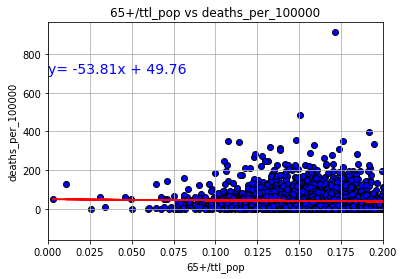

The r-value is -0.07694155220794566
The p-value is 2.5264621638158352e-05


<Figure size 432x288 with 0 Axes>

In [25]:

correlation=st.pearsonr(covid_pop65["65+/ttl_pop"], covid_pop65["deaths_per_100000"])
correlation_coefficient=round(correlation[0],2)

x_values=covid_pop65["65+/ttl_pop"]
y_values=covid_pop65["deaths_per_100000"]
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_values, y_values)

regress_values=x_values*slope+intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(covid_pop65["65+/ttl_pop"], covid_pop65["deaths_per_100000"], marker="o", facecolors="blue", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0, 700), fontsize=14, color="blue")
plt.xlim(0,.2)
plt.grid()
plt.xlabel("65+/ttl_pop")
plt.ylabel("deaths_per_100000")
plt.title("65+/ttl_pop vs deaths_per_100000")

plt.show()
print(f"The r-value is {rvalue}")
print(f"The p-value is {pvalue}")
plt.savefig("pop_deaths.png")


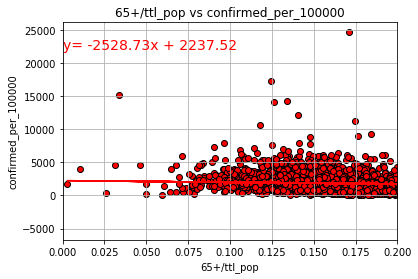

The r-value is -0.13303550281453858
The p-value is 2.7692254841305985e-13


In [24]:
correlation=st.pearsonr(covid_pop65["65+/ttl_pop"], covid_pop65["confirmed_per_100000"])
correlation_coefficient=round(correlation[0],2)

x_values=covid_pop65["65+/ttl_pop"]
y_values=covid_pop65["confirmed_per_100000"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values=x_values*slope+intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(covid_pop65["65+/ttl_pop"], covid_pop65["confirmed_per_100000"], marker="o", facecolors="red", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0, 22000), fontsize=14, color="red")
plt.xlim(0,.2)
plt.grid()
plt.xlabel("65+/ttl_pop")
plt.ylabel("confirmed_per_100000")
plt.title("65+/ttl_pop vs confirmed_per_100000")
plt.savefig("pop_confirmed.png")
plt.show()
print(f"The r-value is {rvalue}")
print(f"The p-value is {pvalue}")


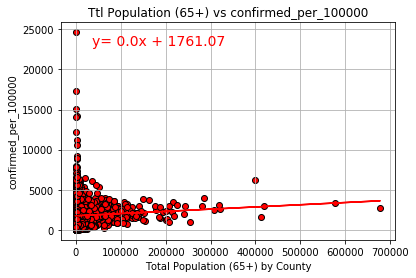

The r-value is 0.0651089821133206
The p-value is 0.00036649389292917143


In [22]:

correlation=st.pearsonr(covid_pop65["total 65+"], covid_pop65["confirmed_per_100000"])
correlation_coefficient=round(correlation[0],2)

x_values=covid_pop65["total 65+"]
y_values=covid_pop65["confirmed_per_100000"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values=x_values*slope+intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(covid_pop65["total 65+"], covid_pop65["confirmed_per_100000"], marker="o", facecolors="red", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (35000, 23000), fontsize=14, color="red")
plt.grid()
plt.xlabel("Total Population (65+) by County")
plt.ylabel("confirmed_per_100000")
plt.title("Ttl Population (65+) vs confirmed_per_100000")
plt.savefig("total_pop_confirmed.png")
plt.show()
print(f"The r-value is {rvalue}")
print(f"The p-value is {pvalue}")

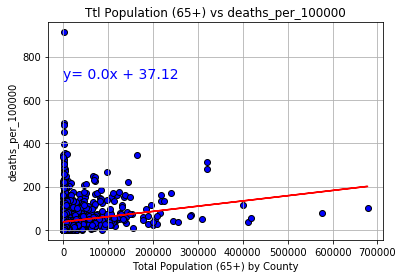

The r-value is 0.1553551224469933
The p-value is 1.2881236897800433e-17


In [23]:
correlation=st.pearsonr(covid_pop65["total 65+"], covid_pop65["deaths_per_100000"])
correlation_coefficient=round(correlation[0],2)

x_values=covid_pop65["total 65+"]
y_values=covid_pop65["deaths_per_100000"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values=x_values*slope+intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(covid_pop65["total 65+"], covid_pop65["deaths_per_100000"], marker="o", facecolors="blue", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0, 700), fontsize=14, color="blue")
plt.grid()
plt.xlabel("Total Population (65+) by County")
plt.ylabel("deaths_per_100000")
plt.title("Ttl Population (65+) vs deaths_per_100000")
plt.savefig("total_pop_deaths.png")

plt.show()            
print(f"The r-value is {rvalue}")
print(f"The p-value is {pvalue}")